In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [28]:
df = pd.read_csv("data/house_data.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


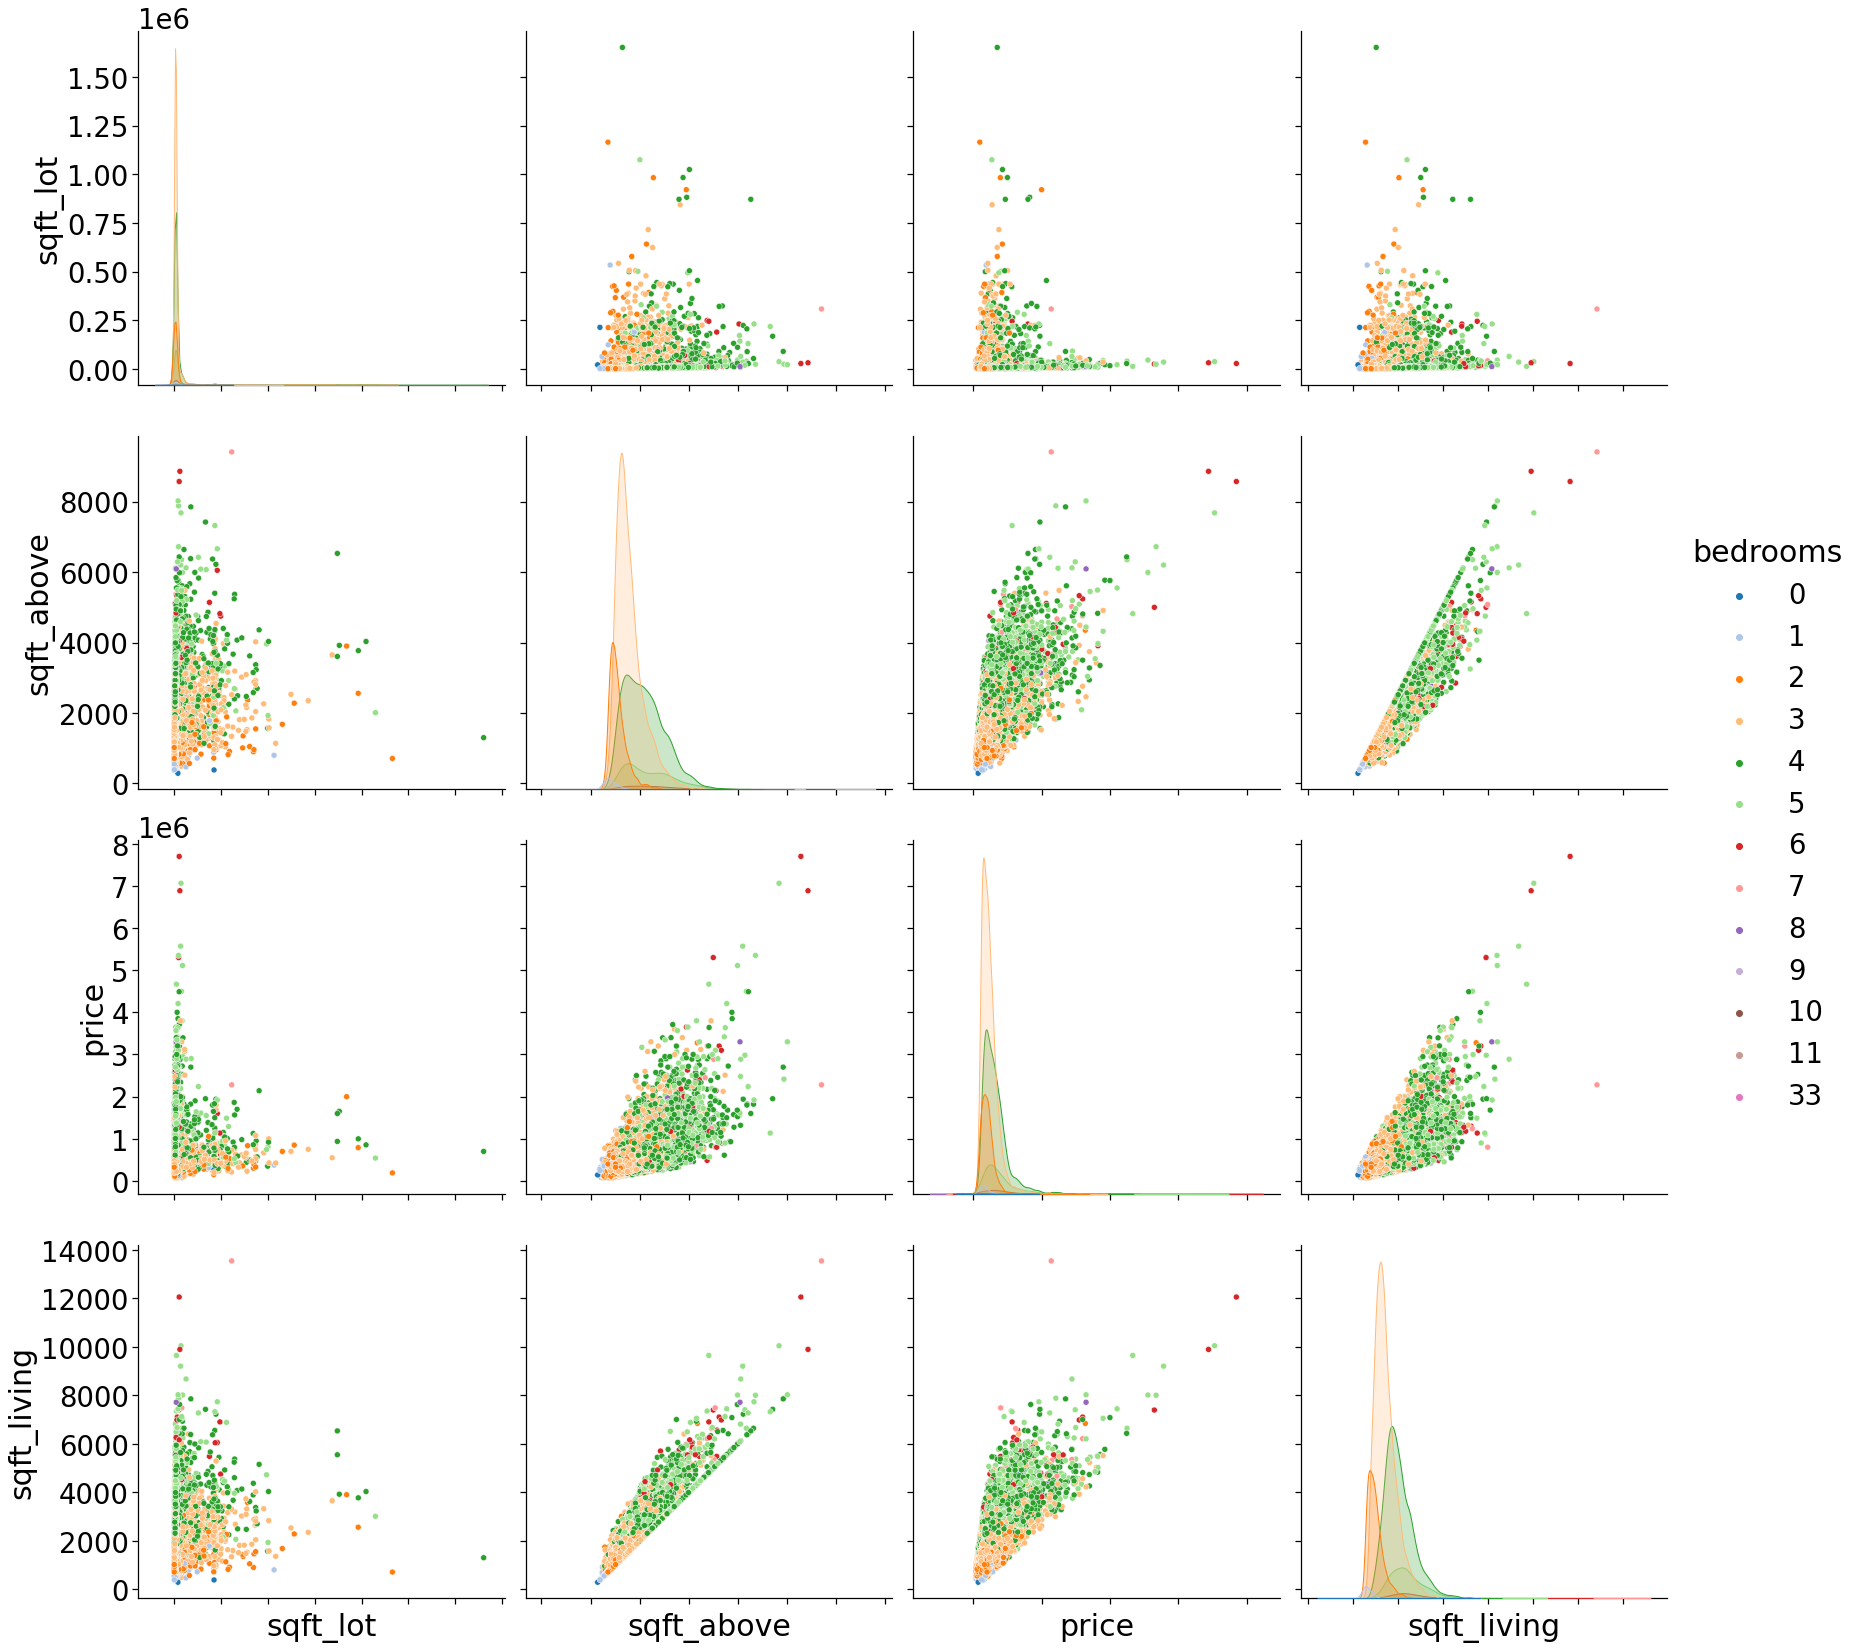

In [168]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);

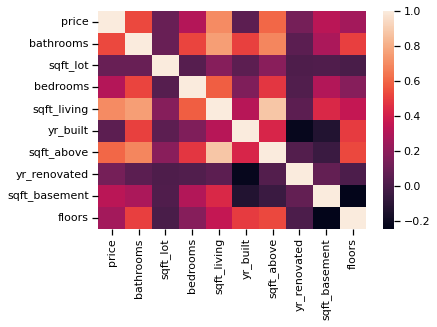

In [31]:
fdf = df[['price','bathrooms','sqft_lot','bedrooms','sqft_living','yr_built','sqft_above','yr_renovated','sqft_basement','floors']]
corr = fdf.corr()
with sns.plotting_context("notebook"):
    sns.heatmap(corr)

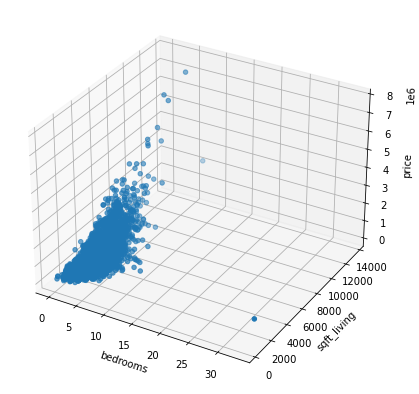

In [45]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df[['bedrooms']].values, df[['sqft_living']].values,df[['price']])
ax.set_xlabel('bedrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')

plt.show()

### Normalization

In [18]:
n = df[['price','bedrooms','sqft_living','yr_built']]
norm = preprocessing.StandardScaler().fit(n).transform(n)

In [19]:
df = pd.DataFrame(norm, columns = ['price','bedrooms','sqft_living','yr_built'])
X = df[['bedrooms','sqft_living','yr_built']]
y = df[['price']]

### Splitting data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 42)

### Multiple linear regression

In [23]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print ('Coefficients: ', regr.coef_ , regr.intercept_)

Coefficients:  [[-0.14941502  0.8485349  -0.19373607]] [-0.00052653]


### R2 score

In [24]:
test_y_ = regr.predict(X_test)
r2_score(y_test,test_y_)

0.5380940647123318